<a href="https://colab.research.google.com/github/ilham-ap/sadtalker/blob/main/sadtalker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installation (around 5 mins)

In [1]:
### make sure that CUDA is available in Edit -> Nootbook settings -> GPU
!nvidia-smi --query-gpu=name,memory.total,memory.free --format=csv,noheader

Tesla T4, 15360 MiB, 15101 MiB


In [15]:
!update-alternatives --install /usr/local/bin/python3 python3 /usr/bin/python3.8 2
!update-alternatives --install /usr/local/bin/python3 python3 /usr/bin/python3.9 1
!sudo apt install python3.8

!sudo apt-get install python3.8-distutils

!python --version

!apt-get update

!apt install software-properties-common

!sudo dpkg --remove --force-remove-reinstreq python3-pip python3-setuptools python3-wheel

!apt-get install python3-pip

print('Git clone project and install requirements...')
!git clone https://github.com/Winfredy/SadTalker &> /dev/null
%cd SadTalker
!export PYTHONPATH=/content/SadTalker:$PYTHONPATH
!python3.8 -m pip install torch==1.12.1+cu113 torchvision==0.13.1+cu113 torchaudio==0.12.1 --extra-index-url https://download.pytorch.org/whl/cu113
!apt update
!apt install ffmpeg &> /dev/null
!python3.8 -m pip install -r requirements.txt

Download models (1 mins)

In [15]:
print('Download pre-trained models...')
!rm -rf checkpoints
!bash scripts/download_models.sh

In [6]:
!curl -o image.jpg "https://cdn1-production-images-kly.akamaized.net/D9qzmK2lydla2cMckT8Z0WhFDYA=/1200x1200/smart/filters:quality(75):strip_icc():format(webp)/kly-media-production/medias/1818405/original/082996800_1514894901-tzuyu-pholar-5.jpg"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 63420  100 63420    0     0   240k      0 --:--:-- --:--:-- --:--:--  240k


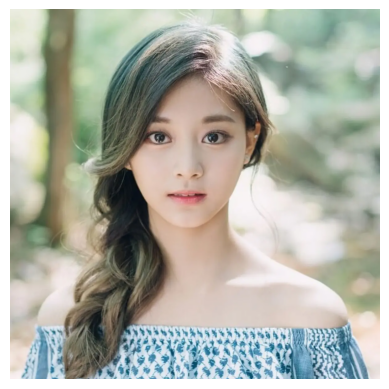

In [15]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread('./image.jpg'))
plt.axis('off')
plt.show()

Animation

In [11]:
# selected audio from exmaple/driven_audio
img = './image.jpg'
print(img)
!python3.8 inference.py --driven_audio ./examples/driven_audio/itosinger1.wav \
           --source_image {img} \
           --result_dir ./results --still --preprocess full --enhancer gfpgan

./image.jpg
using safetensor as default
3DMM Extraction for source image
landmark Det:: 100% 1/1 [00:00<00:00, 16.81it/s]
3DMM Extraction In Video:: 100% 1/1 [00:00<00:00, 61.30it/s]
mel:: 100% 260/260 [00:00<00:00, 41914.02it/s]
audio2exp:: 100% 26/26 [00:00<00:00, 312.51it/s]
Face Renderer:: 100% 130/130 [01:16<00:00,  1.71it/s]
The generated video is named ./results/2024_02_05_13.16.48/image##itosinger1.mp4
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
seamlessClone:: 100% 260/260 [02:47<00:00,  1.55it/s]
The generated video is named ./results/2024_02_05_13.16.48/image##itosinger1_full.mp4
face enhancer....
Face Enhancer:: 100% 260/260 [05:04<00:00,  1.17s/it]
The generated video is named ./results/2024_02_05_13.16.48/image##itosinger1_enhanced.mp4
The generated video is named: ./results/2024_02_05_13.16.48.mp4


In [14]:
# visualize code from makeittalk
import glob
from IPython.display import HTML
from base64 import b64encode
import os, sys

# get the last from results

results = sorted(os.listdir('./results/'))

mp4_name = glob.glob('./results/*.mp4')[len(results)-1]

mp4 = open('{}'.format(mp4_name),'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

print('Display animation: {}'.format(mp4_name), file=sys.stderr)
display(HTML("""
  <video width=256 controls>
        <source src="%s" type="video/mp4">
  </video>
  """ % data_url))


Display animation: ./results/2024_02_05_13.16.48.mp4
